<a href="https://colab.research.google.com/github/muhfadh/Tugas_Praktikum_ML_A_297-233/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
# hanya bisa digunakan di colab
!wget --no-check-certificate \
    https://figshare.com/ndownloader/files/10745875?private_link=a8c22c09f999f60a81bd \
    -O /tmp/melanoma_img.zip
'''

In [ ]:
'''
# digunakan di colab
import os
import zipfile

os.makedirs('/tmp/dataset_melanoma')

local_zip = '/tmp/melanoma_img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/dataset_melanoma')
zip_ref.close()

os.chdir('/tmp/dataset_melanoma')
os.rename("Dermoscopic images of acral melanoma","Acral Melanoma")
os.rename("Dermoscopic images of benign nevi","Benign Nevi")
'''

'\n# digunakan di colab\nimport os\nimport zipfile\n\nos.makedirs(\'/tmp/dataset_melanoma\')\n\nlocal_zip = \'/tmp/melanoma_img.zip\'\nzip_ref = zipfile.ZipFile(local_zip, \'r\')\nzip_ref.extractall(\'/tmp/dataset_melanoma\')\nzip_ref.close()\n\nos.chdir(\'/tmp/dataset_melanoma\')\nos.rename("Dermoscopic images of acral melanoma","Acral Melanoma")\nos.rename("Dermoscopic images of benign nevi","Benign Nevi")\n'

### Code untuk di Jupyter notebook

In [20]:
%cd D:\DATA KULIAH\SEMESTER 7\Pembelajaran Mesin\Praktikum\Dataset

D:\DATA KULIAH\SEMESTER 7\Pembelajaran Mesin\Praktikum\Dataset


In [21]:
%ls

 Volume in drive D is DATA
 Volume Serial Number is F26E-2B50

 Directory of D:\DATA KULIAH\SEMESTER 7\Pembelajaran Mesin\Praktikum\Dataset

26/10/2021  00:45    <DIR>          .
26/10/2021  00:45    <DIR>          ..
25/10/2021  08:05    <DIR>          acral melanoma
25/10/2021  08:05    <DIR>          benign nevi
25/10/2021  23:25         4.325.912 model_1-fix.h5
26/10/2021  00:45           753.016 model_2-fix.h5
               2 File(s)      5.078.928 bytes
               4 Dir(s)  336.556.400.640 bytes free


In [22]:
import os
# path di jupyter
base_dataset_acral = 'D:/DATA KULIAH/SEMESTER 7/Pembelajaran Mesin/Praktikum/Dataset/acral melanoma'
base_dataset_benign = 'D:/DATA KULIAH/SEMESTER 7/Pembelajaran Mesin/Praktikum/Dataset/benign nevi'

print('Nama image acral melanoma: ',os.listdir(base_dataset_acral)[:1], ', Jumlah data :', len(os.listdir(base_dataset_acral)))
print('Nama image benign nevi: ',os.listdir(base_dataset_benign)[:1], ', Jumlah data :', len(os.listdir(base_dataset_benign)))

Nama image acral melanoma:  ['AM (1).JPG'] , Jumlah data : 350
Nama image benign nevi:  ['BN (1).jpg'] , Jumlah data : 374


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=15,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    brightness_range = [0.2,1.0],
                    fill_mode = 'nearest', 
                    validation_split=0.2)

val_datagen = ImageDataGenerator(
                    rescale=1/255, 
                    validation_split=0.2)

In [37]:
batch_size=32
train_dataset = train_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory='D:/DATA KULIAH/SEMESTER 7/Pembelajaran Mesin/Praktikum/Dataset/',
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='binary')

validation_dataset = val_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory='D:/DATA KULIAH/SEMESTER 7/Pembelajaran Mesin/Praktikum/Dataset/',
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='binary')

Found 580 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


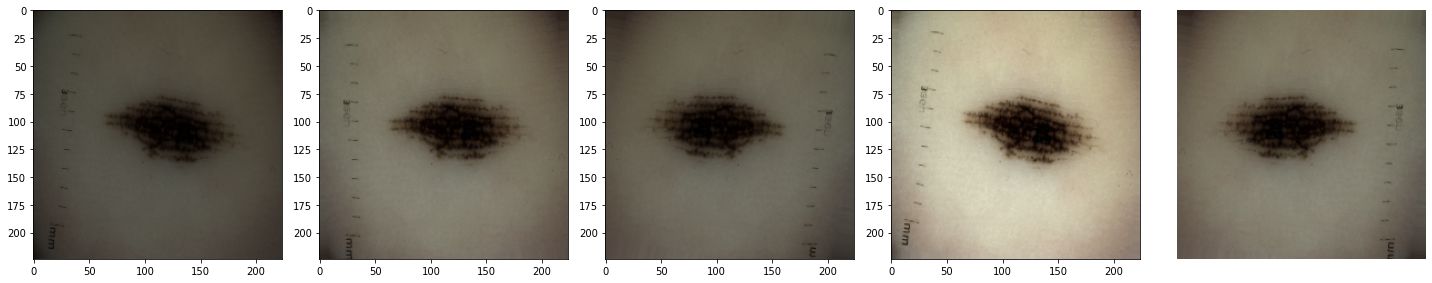

In [42]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.axis('off')
    plt.show()
    
augmented_images = [train_dataset[0][0][0] for i in range(5)]
plotImages(augmented_images)

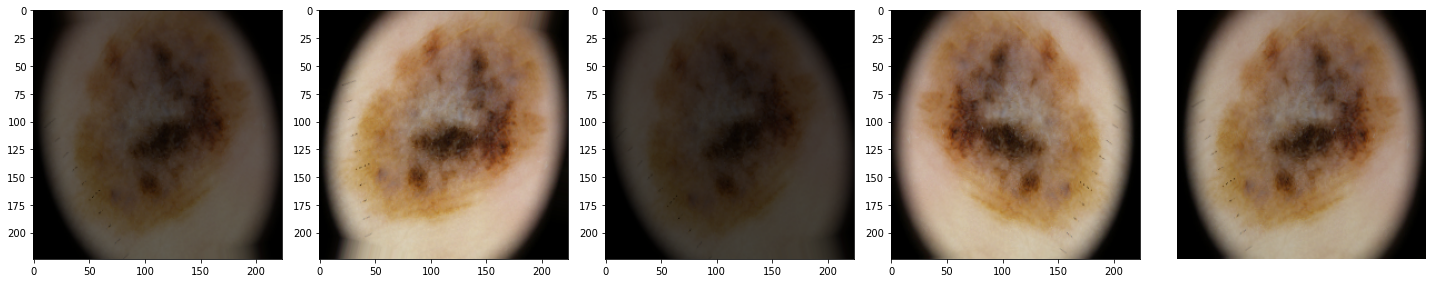

In [44]:
augmented_images = [train_dataset[0][0][4] for i in range(5)]
plotImages(augmented_images)

In [45]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [50]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(224, 224, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(16, activation='gelu')(x)
x = layers.Dense(32, activation='gelu')(x)
x = layers.Dense(32, activation='gelu')(x)
x = layers.Dense(64, activation='gelu')(x)
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [49]:
# Tampilkan model summary
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2408464   
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 2,411,185
Trainable params: 2,411,185
Non-trainable params: 0
_________________________________________________

In [52]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [53]:
H = model.fit(train_dataset, batch_size=32, epochs=50, validation_data=validation_dataset)

Epoch 1/50
19/19 [==============================] - 62s 3s/step - loss: 1.2892 - acc: 0.5293 - val_loss: 0.8961 - val_acc: 0.5347
Epoch 2/50
19/19 [==============================] - 57s 3s/step - loss: 0.7248 - acc: 0.5552 - val_loss: 0.7185 - val_acc: 0.5139
Epoch 3/50
19/19 [==============================] - 55s 3s/step - loss: 0.6928 - acc: 0.5793 - val_loss: 1.0389 - val_acc: 0.5278
Epoch 4/50
19/19 [==============================] - 55s 3s/step - loss: 0.7461 - acc: 0.5983 - val_loss: 1.0030 - val_acc: 0.5000
Epoch 5/50
19/19 [==============================] - 56s 3s/step - loss: 0.8284 - acc: 0.5155 - val_loss: 1.0495 - val_acc: 0.5278
Epoch 6/50
19/19 [==============================] - 55s 3s/step - loss: 0.8069 - acc: 0.5672 - val_loss: 0.7203 - val_acc: 0.6597
Epoch 7/50
19/19 [==============================] - 56s 3s/step - loss: 0.6770 - acc: 0.6500 - val_loss: 0.9427 - val_acc: 0.5972
Epoch 8/50
19/19 [==============================] - 55s 3s/step - loss: 1.0204 - acc: 0.56

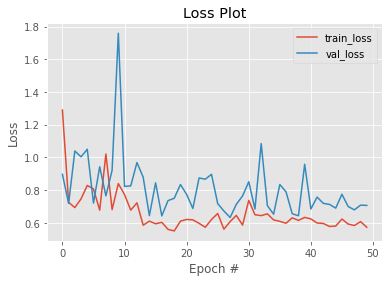

In [55]:
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

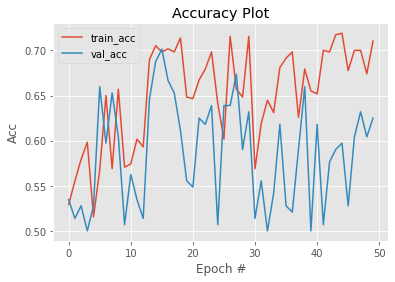

In [56]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [57]:
img_input = layers.Input(shape=(224, 224, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

model2 = Model(img_input, output)

In [58]:
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                9633856   
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 9,638,081
Trainable params: 9,638,081
Non-trainable params: 0
_________________________________________________________________


In [67]:
model2.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

H2 = model2.fit(train_dataset, batch_size=32, epochs=50, validation_data=validation_dataset, steps_per_epoch = 580//batch_size, validation_steps = 144//batch_size)

Epoch 1/50
18/18 [==============================] - 55s 3s/step - loss: 5.6568 - acc: 0.5000 - val_loss: 0.8010 - val_acc: 0.6094
Epoch 2/50
18/18 [==============================] - 54s 3s/step - loss: 1.1948 - acc: 0.6168 - val_loss: 1.8760 - val_acc: 0.5625
Epoch 3/50
18/18 [==============================] - 53s 3s/step - loss: 1.0322 - acc: 0.6077 - val_loss: 0.9258 - val_acc: 0.6953
Epoch 4/50
18/18 [==============================] - 56s 3s/step - loss: 0.9763 - acc: 0.6058 - val_loss: 1.1490 - val_acc: 0.6484
Epoch 5/50
18/18 [==============================] - 54s 3s/step - loss: 1.1995 - acc: 0.6022 - val_loss: 1.0336 - val_acc: 0.6094
Epoch 6/50
18/18 [==============================] - 56s 3s/step - loss: 3.1590 - acc: 0.5274 - val_loss: 1.2053 - val_acc: 0.6797
Epoch 7/50
18/18 [==============================] - 56s 3s/step - loss: 3.2393 - acc: 0.5511 - val_loss: 1.7142 - val_acc: 0.6016
Epoch 8/50
18/18 [==============================] - 56s 3s/step - loss: 0.9383 - acc: 0.63

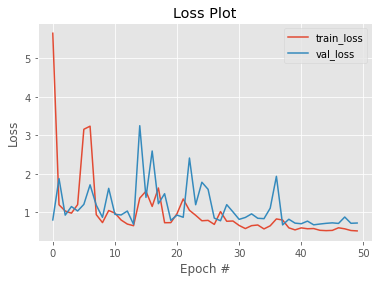

In [68]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

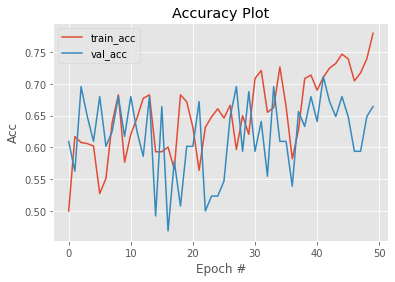

In [69]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [75]:
_, acc_model1 = model.evaluate(validation_dataset)

5/5 [==============================] - 10s 2s/step - loss: 0.6982 - acc: 0.5208


In [76]:
acc_model1

0.5208333134651184

In [77]:
_, acc_model2 = model2.evaluate(validation_dataset)

5/5 [==============================] - 10s 2s/step - loss: 0.7422 - acc: 0.6458


In [78]:
acc_model2

0.6458333134651184